In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import folium

In [6]:
from folium.plugins import HeatMap

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
from sklearn.ensemble import ExtraTreesRegressor

In [10]:
from sklearn.metrics import mean_absolute_error,r2_score

In [11]:
import math
import plotly.graph_objects as go
import plotly.express as px
import eli5
import graphviz
import networkx as nx

In [12]:
from xgboost import XGBRegressor

In [13]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

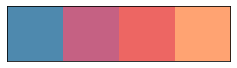

In [14]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

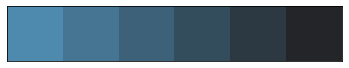

In [15]:
Bangalore = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(Bangalore),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

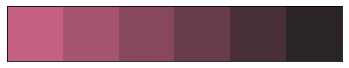

In [16]:
Mumbai = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(Mumbai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

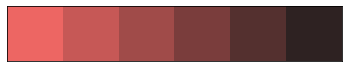

In [17]:
Kolkata = sns.dark_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(Kolkata),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

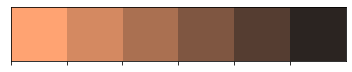

In [18]:
Delhi = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(Delhi),size=1)

In [19]:
Bangalore = pd.read_csv('Bangalore.csv')
Mumbai = pd.read_csv('Mumbai.csv')
Kolkata = pd.read_csv('Kolkata.csv')
Delhi = pd.read_csv('Delhi.csv')

In [20]:
Bangalore.head()

Unnamed: 0  Unnamed: 0.1     Price  Area                         Location  \
0           0           0.0  0.003000  3340                 JP Nagar Phase 1   
1           1           1.0  0.000789  1045       Dasarahalli on Tumkur Road   
2           2           2.0  0.000487  1179  Kannur on Thanisandra Main Road   
3           3           3.0  0.000836  1675                     Doddanekundi   
4           4           4.0  0.000684  1670                          Kengeri   

   No. of Bedrooms  Resale  MaintenanceStaff  Gymnasium  SwimmingPool  ...  \
0                4       0               1.0        1.0           1.0  ...   
1                2       0               0.0        1.0           1.0  ...   
2                2       0               0.0        1.0           1.0  ...   
3                3       0               0.0        0.0           0.0  ...   
4                3       0               1.0        1.0           1.0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse   TV  \
0            1.0  0.0              0.0        0.0         0.0  0.0   
1            1.0  0.0              1.0        0.0         0.0  0.0   
2            1.0  0.0              0.0        0.0         0.0  0.0   
3            1.0  0.0              0.0        0.0         0.0  0.0   
4            1.0  0.0              0.0        0.0         0.0  0.0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0          0.0   0.0       0.0           0.0  
1          0.0   0.0       0.0           0.0  
2          0.0   0.0       0.0           0.0  
3          0.0   0.0       0.0           0.0  
4          0.0   0.0       0.0           0.0  

[5 rows x 42 columns]

In [21]:
Mumbai.head()

Price  Area  Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0  4850000   720  Kharghar                1       1                 1   
1  4500000   600  Kharghar                1       1                 1   
2  6700000   650  Kharghar                1       1                 1   
3  4500000   650  Kharghar                1       1                 1   
4  5000000   665  Kharghar                1       1                 1   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          0             0                  0             0  ...   
1          1             1                  0             1  ...   
2          1             1                  0             1  ...   
3          0             0                  1             0  ...   
4          0             0                  1             0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                1          0           0   0   
1              1    0                1          0           0   0   
2              1    0                1          0           0   0   
3              1    1                1          0           0   0   
4              1    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         1             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [22]:
Kolkata.head()

Price  Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0  2235000  1016      Barasat                3       0                 0   
1  3665999  1111    Keshtopur                2       0                 1   
2  3774000  1020     Rajarhat                2       0                 0   
3  2524000   935  Narendrapur                2       0                 0   
4  8300000  1956     New Town                3       1                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          1             1                  1             1  ...   
1          1             0                  1             1  ...   
2          1             0                  0             0  ...   
3          1             1                  1             1  ...   
4          1             1                  1             1  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                0          0           0   0   
1              0    0                0          0           0   0   
2              1    0                0          0           0   0   
3              0    0                0          0           0   0   
4              1    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [23]:
Delhi.head()

Price  Area          Location  No. of Bedrooms  Resale  \
0  10500000  1200  Sector 10 Dwarka                2       1   
1   6000000  1000       Uttam Nagar                3       0   
2  15000000  1350      Sarita Vihar                2       1   
3   2500000   435       Uttam Nagar                2       0   
4   5800000   900        Dwarka Mor                3       0   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
0                 0          1             0                  0             1   
1                 0          0             0                  0             0   
2                 0          0             0                  0             0   
3                 0          0             0                  0             0   
4                 0          0             0                  0             0   

   ...  LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0  ...              1    0                1          0           0   0   
1  ...              0    0                0          0           0   0   
2  ...              0    0                0          0           0   0   
3  ...              0    0                1          0           0   0   
4  ...              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [24]:
Bangalore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1950 non-null   int64  
 1   Unnamed: 0.1         1950 non-null   float64
 2   Price                1950 non-null   float64
 3   Area                 1950 non-null   int64  
 4   Location             1950 non-null   object 
 5   No. of Bedrooms      1950 non-null   int64  
 6   Resale               1950 non-null   int64  
 7   MaintenanceStaff     1950 non-null   float64
 8   Gymnasium            1950 non-null   float64
 9   SwimmingPool         1950 non-null   float64
 10  LandscapedGardens    1950 non-null   float64
 11  JoggingTrack         1950 non-null   float64
 12  RainWaterHarvesting  1950 non-null   float64
 13  IndoorGames          1950 non-null   float64
 14  ShoppingMall         1950 non-null   float64
 15  Intercom             1950 non-null   f

In [25]:
Mumbai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                7719 non-null   int64 
 1   Area                 7719 non-null   int64 
 2   Location             7719 non-null   object
 3   No. of Bedrooms      7719 non-null   int64 
 4   Resale               7719 non-null   int64 
 5   MaintenanceStaff     7719 non-null   int64 
 6   Gymnasium            7719 non-null   int64 
 7   SwimmingPool         7719 non-null   int64 
 8   LandscapedGardens    7719 non-null   int64 
 9   JoggingTrack         7719 non-null   int64 
 10  RainWaterHarvesting  7719 non-null   int64 
 11  IndoorGames          7719 non-null   int64 
 12  ShoppingMall         7719 non-null   int64 
 13  Intercom             7719 non-null   int64 
 14  SportsFacility       7719 non-null   int64 
 15  ATM                  7719 non-null   int64 
 16  ClubHo

In [26]:
Kolkata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6507 entries, 0 to 6506
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6507 non-null   int64 
 1   Area                 6507 non-null   int64 
 2   Location             6507 non-null   object
 3   No. of Bedrooms      6507 non-null   int64 
 4   Resale               6507 non-null   int64 
 5   MaintenanceStaff     6507 non-null   int64 
 6   Gymnasium            6507 non-null   int64 
 7   SwimmingPool         6507 non-null   int64 
 8   LandscapedGardens    6507 non-null   int64 
 9   JoggingTrack         6507 non-null   int64 
 10  RainWaterHarvesting  6507 non-null   int64 
 11  IndoorGames          6507 non-null   int64 
 12  ShoppingMall         6507 non-null   int64 
 13  Intercom             6507 non-null   int64 
 14  SportsFacility       6507 non-null   int64 
 15  ATM                  6507 non-null   int64 
 16  ClubHo

In [27]:
Delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4998 non-null   int64 
 1   Area                 4998 non-null   int64 
 2   Location             4998 non-null   object
 3   No. of Bedrooms      4998 non-null   int64 
 4   Resale               4998 non-null   int64 
 5   MaintenanceStaff     4998 non-null   int64 
 6   Gymnasium            4998 non-null   int64 
 7   SwimmingPool         4998 non-null   int64 
 8   LandscapedGardens    4998 non-null   int64 
 9   JoggingTrack         4998 non-null   int64 
 10  RainWaterHarvesting  4998 non-null   int64 
 11  IndoorGames          4998 non-null   int64 
 12  ShoppingMall         4998 non-null   int64 
 13  Intercom             4998 non-null   int64 
 14  SportsFacility       4998 non-null   int64 
 15  ATM                  4998 non-null   int64 
 16  ClubHo

In [28]:
Bangalore.describe()

Unnamed: 0  Unnamed: 0.1        Price         Area  No. of Bedrooms  \
count  1950.000000   1950.000000  1950.000000  1950.000000      1950.000000   
mean    975.495385    975.495385     0.000996  1516.041538         2.532821   
std     563.068795    563.068795     0.001293   764.019427         0.676286   
min       0.000000      0.000000     0.000210   525.000000         1.000000   
25%     488.250000    488.250000     0.000498  1147.500000         2.000000   
50%     975.500000    975.500000     0.000695  1330.000000         3.000000   
75%    1462.750000   1462.750000     0.001000  1610.000000         3.000000   
max    1950.000000   1950.000000     0.020270  9900.000000         5.000000   

            Resale  MaintenanceStaff    Gymnasium  SwimmingPool  \
count  1950.000000       1950.000000  1950.000000   1950.000000   
mean      0.092308          0.119487     0.924103      0.843077   
std       0.289534          0.324444     0.264902      0.363822   
min       0.000000          0.000000     0.000000      0.000000   
25%       0.000000          0.000000     1.000000      1.000000   
50%       0.000000          0.000000     1.000000      1.000000   
75%       0.000000          0.000000     1.000000      1.000000   
max       1.000000          1.000000     1.000000      1.000000   

       LandscapedGardens  ...  LiftAvailable          BED  VaastuCompliant  \
count        1950.000000  ...    1950.000000  1950.000000      1950.000000   
mean            0.672308  ...       0.851282     0.127179         0.445641   
std             0.469492  ...       0.355901     0.333259         0.497164   
min             0.000000  ...       0.000000     0.000000         0.000000   
25%             0.000000  ...       1.000000     0.000000         0.000000   
50%             1.000000  ...       1.000000     0.000000         0.000000   
75%             1.000000  ...       1.000000     0.000000         1.000000   
max             1.000000  ...       1.000000     1.000000         1.000000   

         Microwave   GolfCourse           TV  DiningTable         Sofa  \
count  1950.000000  1950.000000  1950.000000  1950.000000  1950.000000   
mean      0.125641     0.033333     0.125641     0.125641     0.125641   
std       0.331529     0.179552     0.331529     0.331529     0.331529   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Wardrobe  Refrigerator  
count    1950.0   1950.000000  
mean        0.0      0.125641  
std         0.0      0.331529  
min         0.0      0.000000  
25%         0.0      0.000000  
50%         0.0      0.000000  
75%         0.0      0.000000  
max         0.0      1.000000  

[8 rows x 41 columns]

In [29]:
Mumbai.describe()

Price         Area  No. of Bedrooms       Resale  \
count  7.719000e+03  7719.000000      7719.000000  7719.000000   
mean   1.506165e+07   998.409250         1.913331     0.647105   
std    2.052100e+07   550.967809         0.855376     0.477901   
min    2.000000e+06   200.000000         1.000000     0.000000   
25%    5.300000e+06   650.000000         1.000000     0.000000   
50%    9.500000e+06   900.000000         2.000000     1.000000   
75%    1.700000e+07  1177.000000         2.000000     1.000000   
max    4.200000e+08  8511.000000         7.000000     1.000000   

       MaintenanceStaff    Gymnasium  SwimmingPool  LandscapedGardens  \
count       7719.000000  7719.000000   7719.000000        7719.000000   
mean           7.498899     7.473896      7.437881           7.441638   
std            3.197923     3.252095      3.328245           3.320401   
min            0.000000     0.000000      0.000000           0.000000   
25%            9.000000     9.000000      9.000000           9.000000   
50%            9.000000     9.000000      9.000000           9.000000   
75%            9.000000     9.000000      9.000000           9.000000   
max            9.000000     9.000000      9.000000           9.000000   

       JoggingTrack  RainWaterHarvesting  ...  LiftAvailable          BED  \
count   7719.000000          7719.000000  ...    7719.000000  7719.000000   
mean       7.439435             7.477005  ...       7.518331     7.417930   
std        3.325002             3.245418  ...       3.155041     3.369523   
min        0.000000             0.000000  ...       0.000000     0.000000   
25%        9.000000             9.000000  ...       9.000000     9.000000   
50%        9.000000             9.000000  ...       9.000000     9.000000   
75%        9.000000             9.000000  ...       9.000000     9.000000   
max        9.000000             9.000000  ...       9.000000     9.000000   

       VaastuCompliant    Microwave   GolfCourse           TV  DiningTable  \
count      7719.000000  7719.000000  7719.000000  7719.000000  7719.000000   
mean          7.454722     7.372069     7.379712     7.379065     7.373624   
std           3.292904     3.462108     3.446892     3.448185     3.459020   
min           0.000000     0.000000     0.000000     0.000000     0.000000   
25%           9.000000     9.000000     9.000000     9.000000     9.000000   
50%           9.000000     9.000000     9.000000     9.000000     9.000000   
75%           9.000000     9.000000     9.000000     9.000000     9.000000   
max           9.000000     9.000000     9.000000     9.000000     9.000000   

              Sofa     Wardrobe  Refrigerator  
count  7719.000000  7719.000000   7719.000000  
mean      7.374530     7.383988      7.374789  
std       3.457217     3.438345      3.456702  
min       0.000000     0.000000      0.000000  
25%       9.000000     9.000000      9.000000  
50%       9.000000     9.000000      9.000000  
75%       9.000000     9.000000      9.000000  
max       9.000000     9.000000      9.000000  

[8 rows x 39 columns]

In [30]:
Kolkata.describe()

Price          Area  No. of Bedrooms       Resale  \
count  6.507000e+03   6507.000000      6507.000000  6507.000000   
mean   8.508570e+06   1344.166897         2.631166     0.311818   
std    1.465939e+07    807.698043         0.712283     0.463272   
min    2.000000e+06    350.000000         1.000000     0.000000   
25%    3.300000e+06    920.000000         2.000000     0.000000   
50%    4.940000e+06   1144.000000         3.000000     0.000000   
75%    8.000000e+06   1454.000000         3.000000     1.000000   
max    5.040000e+08  10000.000000         9.000000     1.000000   

       MaintenanceStaff    Gymnasium  SwimmingPool  LandscapedGardens  \
count       6507.000000  6507.000000   6507.000000        6507.000000   
mean           8.899032     8.903028      8.901644           8.901644   
std            0.936229     0.899654      0.912482           0.912482   
min            0.000000     0.000000      0.000000           0.000000   
25%            9.000000     9.000000      9.000000           9.000000   
50%            9.000000     9.000000      9.000000           9.000000   
75%            9.000000     9.000000      9.000000           9.000000   
max            9.000000     9.000000      9.000000           9.000000   

       JoggingTrack  RainWaterHarvesting  ...  LiftAvailable          BED  \
count   6507.000000          6507.000000  ...    6507.000000  6507.000000   
mean       8.900415             8.899493  ...       8.905025     8.897034   
std        0.923734             0.932083  ...       0.880791     0.953984   
min        0.000000             0.000000  ...       0.000000     0.000000   
25%        9.000000             9.000000  ...       9.000000     9.000000   
50%        9.000000             9.000000  ...       9.000000     9.000000   
75%        9.000000             9.000000  ...       9.000000     9.000000   
max        9.000000             9.000000  ...       9.000000     9.000000   

       VaastuCompliant    Microwave   GolfCourse           TV  DiningTable  \
count      6507.000000  6507.000000  6507.000000  6507.000000  6507.000000   
mean          8.899339     8.897034     8.896727     8.896727     8.896880   
std           0.933467     0.953984     0.956686     0.956686     0.955336   
min           0.000000     0.000000     0.000000     0.000000     0.000000   
25%           9.000000     9.000000     9.000000     9.000000     9.000000   
50%           9.000000     9.000000     9.000000     9.000000     9.000000   
75%           9.000000     9.000000     9.000000     9.000000     9.000000   
max           9.000000     9.000000     9.000000     9.000000     9.000000   

              Sofa     Wardrobe  Refrigerator  
count  6507.000000  6507.000000   6507.000000  
mean      8.897034     8.896266      8.897034  
std       0.953984     0.960724      0.953984  
min       0.000000     0.000000      0.000000  
25%       9.000000     9.000000      9.000000  
50%       9.000000     9.000000      9.000000  
75%       9.000000     9.000000      9.000000  
max       9.000000     9.000000      9.000000  

[8 rows x 39 columns]

In [31]:
Delhi.describe()

Price          Area  No. of Bedrooms      Resale  \
count  4.998000e+03   4998.000000      4998.000000  4998.00000   
mean   1.588638e+07   1277.343737         2.657863     0.80012   
std    4.612894e+07    915.217800         0.820605     0.39995   
min    2.000000e+06    200.000000         1.000000     0.00000   
25%    2.900000e+06    800.000000         2.000000     1.00000   
50%    5.500000e+06   1000.000000         3.000000     1.00000   
75%    1.580000e+07   1650.000000         3.000000     1.00000   
max    8.546000e+08  16000.000000         8.000000     1.00000   

       MaintenanceStaff    Gymnasium  SwimmingPool  LandscapedGardens  \
count       4998.000000  4998.000000   4998.000000        4998.000000   
mean           5.423770     5.472589      5.415966           5.435574   
std            4.378355     4.322819      4.387116           4.365041   
min            0.000000     0.000000      0.000000           0.000000   
25%            0.000000     0.000000      0.000000           0.000000   
50%            9.000000     9.000000      9.000000           9.000000   
75%            9.000000     9.000000      9.000000           9.000000   
max            9.000000     9.000000      9.000000           9.000000   

       JoggingTrack  RainWaterHarvesting  ...  LiftAvailable          BED  \
count   4998.000000          4998.000000  ...    4998.000000  4998.000000   
mean       5.412765             5.437975  ...       5.655662     5.416367   
std        4.390702             4.362324  ...       4.102704     4.386668   
min        0.000000             0.000000  ...       0.000000     0.000000   
25%        0.000000             0.000000  ...       1.000000     0.000000   
50%        9.000000             9.000000  ...       9.000000     9.000000   
75%        9.000000             9.000000  ...       9.000000     9.000000   
max        9.000000             9.000000  ...       9.000000     9.000000   

       VaastuCompliant    Microwave   GolfCourse           TV  DiningTable  \
count      4998.000000  4998.000000  4998.000000  4998.000000  4998.000000   
mean          5.456783     5.413165     5.394958     5.415566     5.408764   
std           4.340938     4.390254     4.410549     4.387565     4.395176   
min           0.000000     0.000000     0.000000     0.000000     0.000000   
25%           0.000000     0.000000     0.000000     0.000000     0.000000   
50%           9.000000     9.000000     9.000000     9.000000     9.000000   
75%           9.000000     9.000000     9.000000     9.000000     9.000000   
max           9.000000     9.000000     9.000000     9.000000     9.000000   

              Sofa     Wardrobe  Refrigerator  
count  4998.000000  4998.000000   4998.000000  
mean      5.412965     5.394958      5.411565  
std       4.390478     4.410549      4.392045  
min       0.000000     0.000000      0.000000  
25%       0.000000     0.000000      0.000000  
50%       9.000000     9.000000      9.000000  
75%       9.000000     9.000000      9.000000  
max       9.000000     9.000000      9.000000  

[8 rows x 39 columns]

In [32]:
Bangalore.shape

(1950, 42)

In [33]:
Mumbai.shape

(7719, 40)

In [34]:
Kolkata.shape

(6507, 40)

In [35]:
Delhi.shape

(4998, 40)

In [36]:
Bangalore.replace(9,np.nan,inplace=True)
Mumbai.replace(9,np.nan,inplace=True)
Kolkata.replace(9,np.nan,inplace=True)
Delhi.replace(9,np.nan,inplace=True)

In [37]:
Bangalore = Bangalore.dropna()
Mumbai = Mumbai.dropna()
Kolkata = Kolkata.dropna()
Delhi = Delhi.dropna()

In [38]:
Bangalore.shape

(1950, 42)

In [39]:
Mumbai.shape

(1398, 40)

In [40]:
Kolkata.shape

(75, 40)

In [41]:
Delhi.shape

(2002, 40)

In [42]:
Bangalore['Price'] = Bangalore['Price']/100000
Mumbai['Price'] = Mumbai['Price']/100000
Kolkata['Price'] = Kolkata['Price']/100000
Delhi['Price'] = Delhi['Price']/100000

In [43]:
Bangalore.head()

Unnamed: 0  Unnamed: 0.1         Price  Area  \
0           0           0.0  3.000000e-08  3340   
1           1           1.0  7.888000e-09  1045   
2           2           2.0  4.866000e-09  1179   
3           3           3.0  8.358000e-09  1675   
4           4           4.0  6.845000e-09  1670   

                          Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0                 JP Nagar Phase 1                4       0               1.0   
1       Dasarahalli on Tumkur Road                2       0               0.0   
2  Kannur on Thanisandra Main Road                2       0               0.0   
3                     Doddanekundi                3       0               0.0   
4                          Kengeri                3       0               1.0   

   Gymnasium  SwimmingPool  ...  LiftAvailable  BED  VaastuCompliant  \
0        1.0           1.0  ...            1.0  0.0              0.0   
1        1.0           1.0  ...            1.0  0.0              1.0   
2        1.0           1.0  ...            1.0  0.0              0.0   
3        0.0           0.0  ...            1.0  0.0              0.0   
4        1.0           1.0  ...            1.0  0.0              0.0   

   Microwave  GolfCourse   TV  DiningTable  Sofa  Wardrobe  Refrigerator  
0        0.0         0.0  0.0          0.0   0.0       0.0           0.0  
1        0.0         0.0  0.0          0.0   0.0       0.0           0.0  
2        0.0         0.0  0.0          0.0   0.0       0.0           0.0  
3        0.0         0.0  0.0          0.0   0.0       0.0           0.0  
4        0.0         0.0  0.0          0.0   0.0       0.0           0.0  

[5 rows x 42 columns]

In [44]:
Bangalore = Bangalore.drop(['Unnamed: 0.1'],axis = 1)

In [45]:
Bangalore.head()

Unnamed: 0         Price  Area                         Location  \
0           0  3.000000e-08  3340                 JP Nagar Phase 1   
1           1  7.888000e-09  1045       Dasarahalli on Tumkur Road   
2           2  4.866000e-09  1179  Kannur on Thanisandra Main Road   
3           3  8.358000e-09  1675                     Doddanekundi   
4           4  6.845000e-09  1670                          Kengeri   

   No. of Bedrooms  Resale  MaintenanceStaff  Gymnasium  SwimmingPool  \
0                4       0               1.0        1.0           1.0   
1                2       0               0.0        1.0           1.0   
2                2       0               0.0        1.0           1.0   
3                3       0               0.0        0.0           0.0   
4                3       0               1.0        1.0           1.0   

   LandscapedGardens  ...  LiftAvailable  BED  VaastuCompliant  Microwave  \
0                1.0  ...            1.0  0.0              0.0        0.0   
1                1.0  ...            1.0  0.0              1.0        0.0   
2                1.0  ...            1.0  0.0              0.0        0.0   
3                0.0  ...            1.0  0.0              0.0        0.0   
4                1.0  ...            1.0  0.0              0.0        0.0   

   GolfCourse   TV  DiningTable  Sofa  Wardrobe  Refrigerator  
0         0.0  0.0          0.0   0.0       0.0           0.0  
1         0.0  0.0          0.0   0.0       0.0           0.0  
2         0.0  0.0          0.0   0.0       0.0           0.0  
3         0.0  0.0          0.0   0.0       0.0           0.0  
4         0.0  0.0          0.0   0.0       0.0           0.0  

[5 rows x 41 columns]

In [46]:
Bangalore = Bangalore.drop(['Unnamed: 0'],axis=1)

In [47]:
Bangalore.head()

Price  Area                         Location  No. of Bedrooms  \
0  3.000000e-08  3340                 JP Nagar Phase 1                4   
1  7.888000e-09  1045       Dasarahalli on Tumkur Road                2   
2  4.866000e-09  1179  Kannur on Thanisandra Main Road                2   
3  8.358000e-09  1675                     Doddanekundi                3   
4  6.845000e-09  1670                          Kengeri                3   

   Resale  MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  \
0       0               1.0        1.0           1.0                1.0   
1       0               0.0        1.0           1.0                1.0   
2       0               0.0        1.0           1.0                1.0   
3       0               0.0        0.0           0.0                0.0   
4       0               1.0        1.0           1.0                1.0   

   JoggingTrack  ...  LiftAvailable  BED  VaastuCompliant  Microwave  \
0           1.0  ...            1.0  0.0              0.0        0.0   
1           1.0  ...            1.0  0.0              1.0        0.0   
2           1.0  ...            1.0  0.0              0.0        0.0   
3           0.0  ...            1.0  0.0              0.0        0.0   
4           1.0  ...            1.0  0.0              0.0        0.0   

   GolfCourse   TV  DiningTable  Sofa  Wardrobe  Refrigerator  
0         0.0  0.0          0.0   0.0       0.0           0.0  
1         0.0  0.0          0.0   0.0       0.0           0.0  
2         0.0  0.0          0.0   0.0       0.0           0.0  
3         0.0  0.0          0.0   0.0       0.0           0.0  
4         0.0  0.0          0.0   0.0       0.0           0.0  

[5 rows x 40 columns]

In [48]:
sns.set_style('whitegrid')

In [49]:
def triple_plot(x,title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x,ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram+KDE')
    sns.boxplot(x,ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x,ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin Plot')
    fig.suptitle(title,fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wit

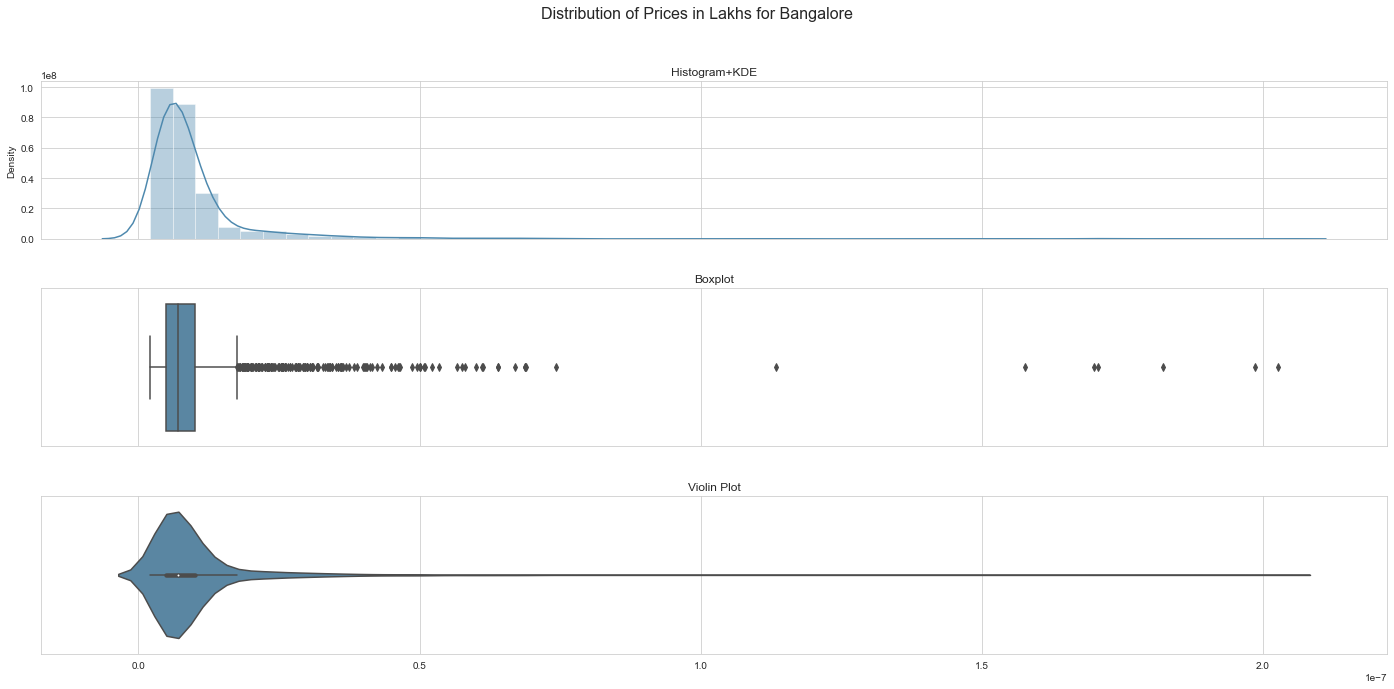

In [50]:
triple_plot(Bangalore['Price'],'Distribution of Prices in Lakhs for Bangalore',custom_colors[0])

c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wit

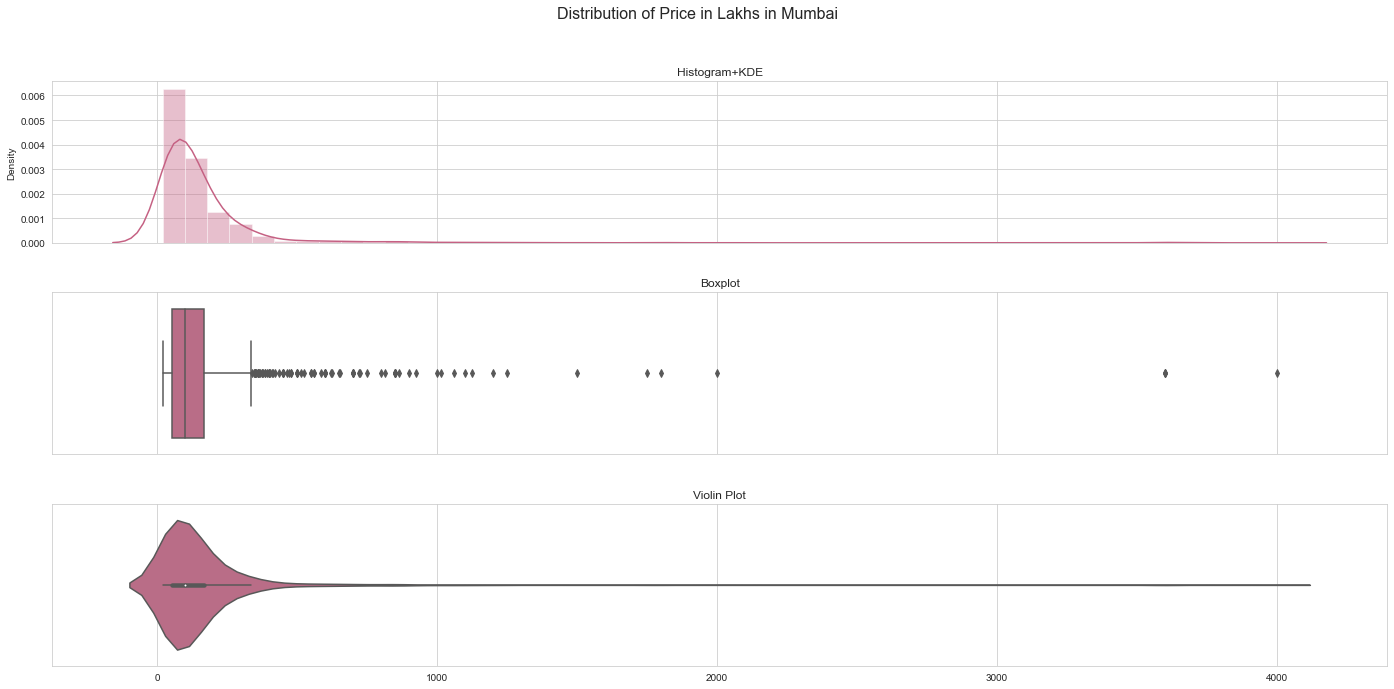

In [51]:
triple_plot(Mumbai['Price'],'Distribution of Price in Lakhs in Mumbai',custom_colors[1])

c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wit

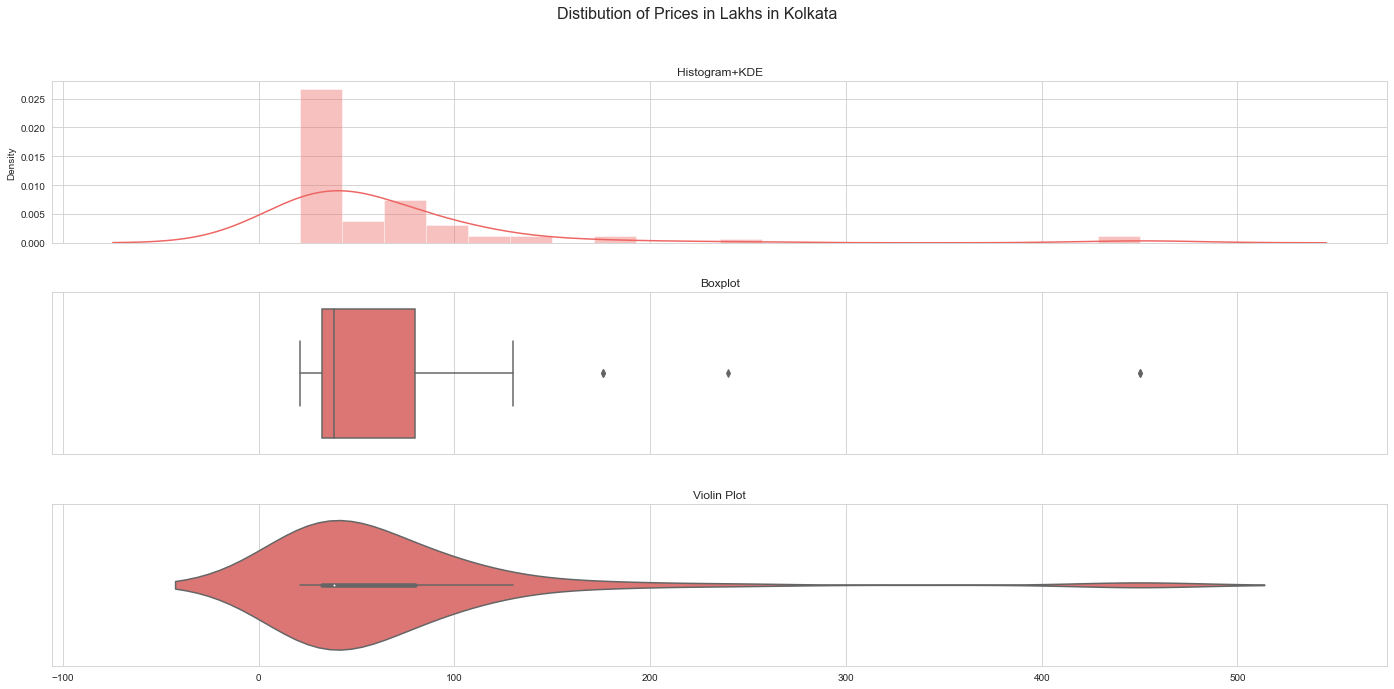

In [52]:
triple_plot(Kolkata['Price'],'Distibution of Prices in Lakhs in Kolkata',custom_colors[2])

c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wit

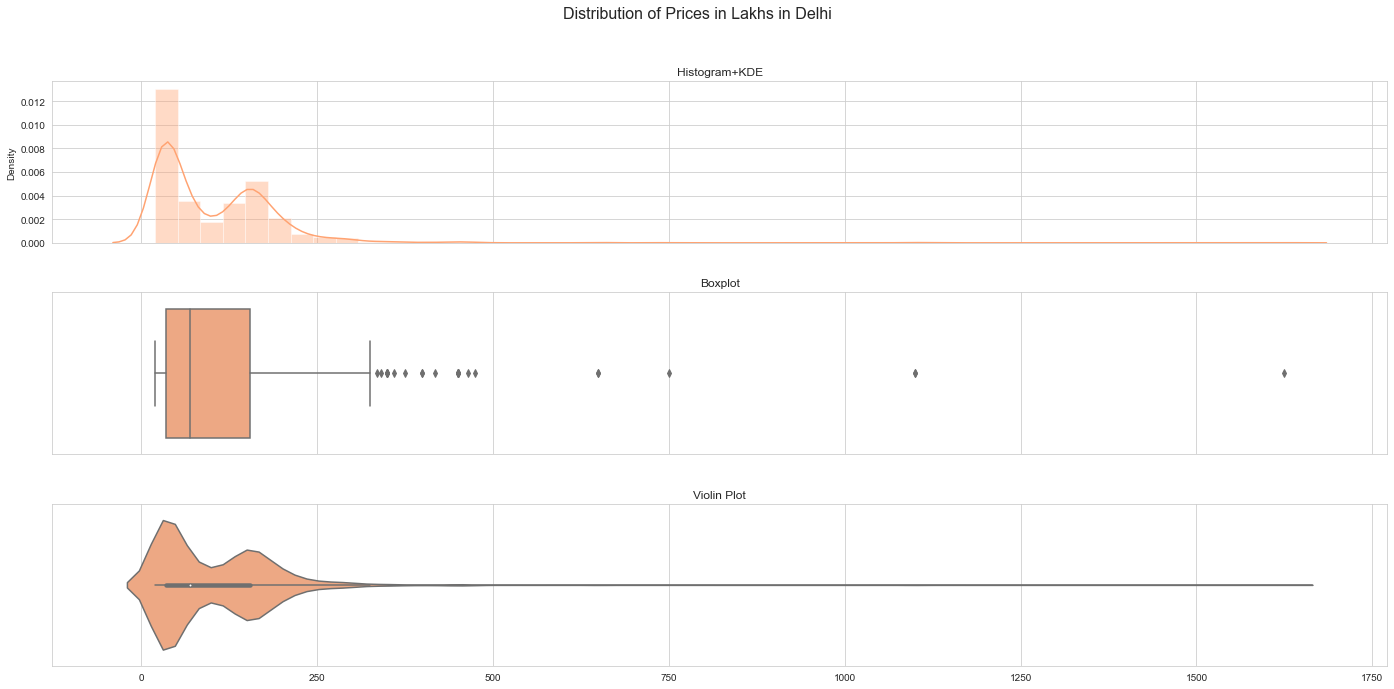

In [53]:
triple_plot(Delhi['Price'],'Distribution of Prices in Lakhs in Delhi',custom_colors[3])

In [54]:
def count_plot(data,title):
    df1=data[data['Resale']== 0]
    df2=data[data['Resale']== 1]
    fig,ax = plt.subplots(1,2,figsize=(15,10))
    ax[0]=sns.countplot(y='Location', data=df1, order=df1.Location.value_counts().index[:10],ax=ax[0])
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df2, order=df2.Location.value_counts().index[:10],ax=ax[1])
    ax[1].set_title('Number of Resale Properties')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

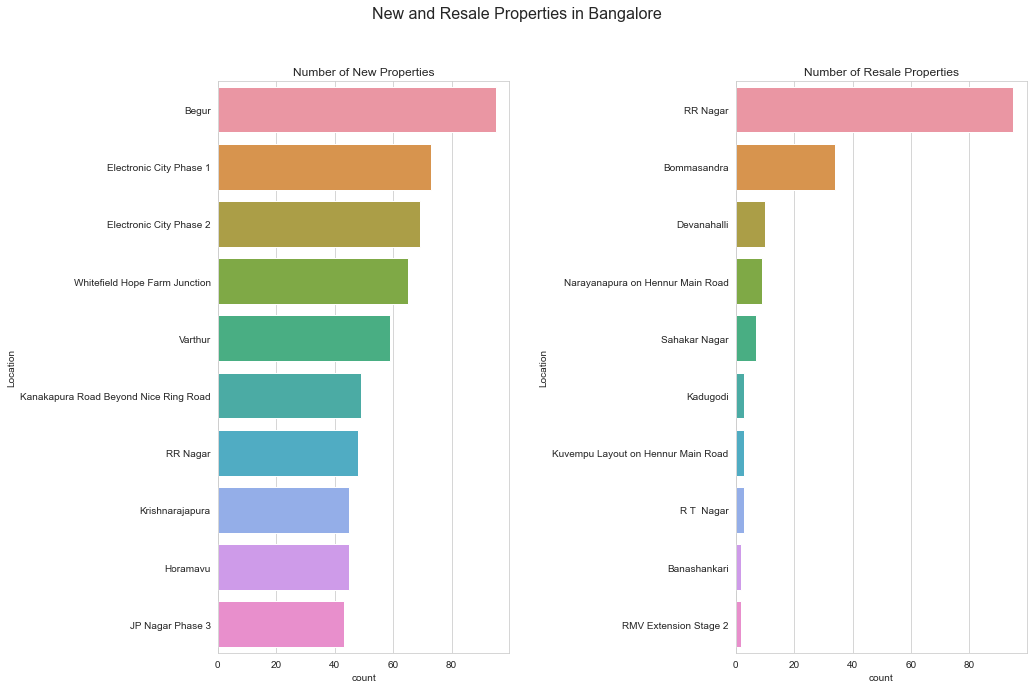

In [55]:
count_plot(Bangalore,'New and Resale Properties in Bangalore')

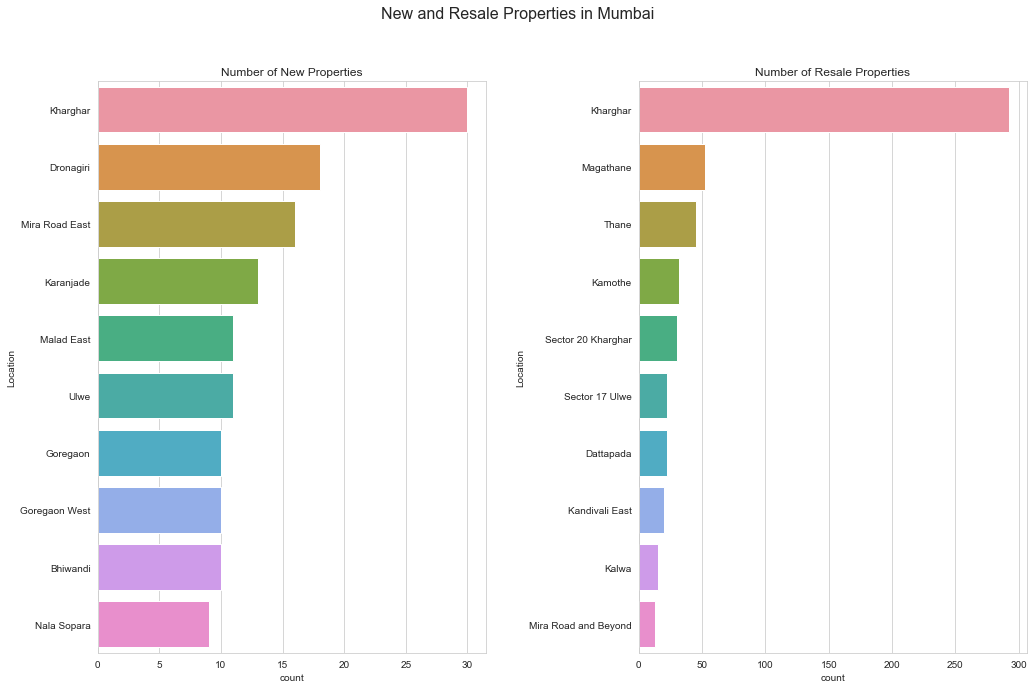

In [56]:
count_plot(Mumbai,'New and Resale Properties in Mumbai')

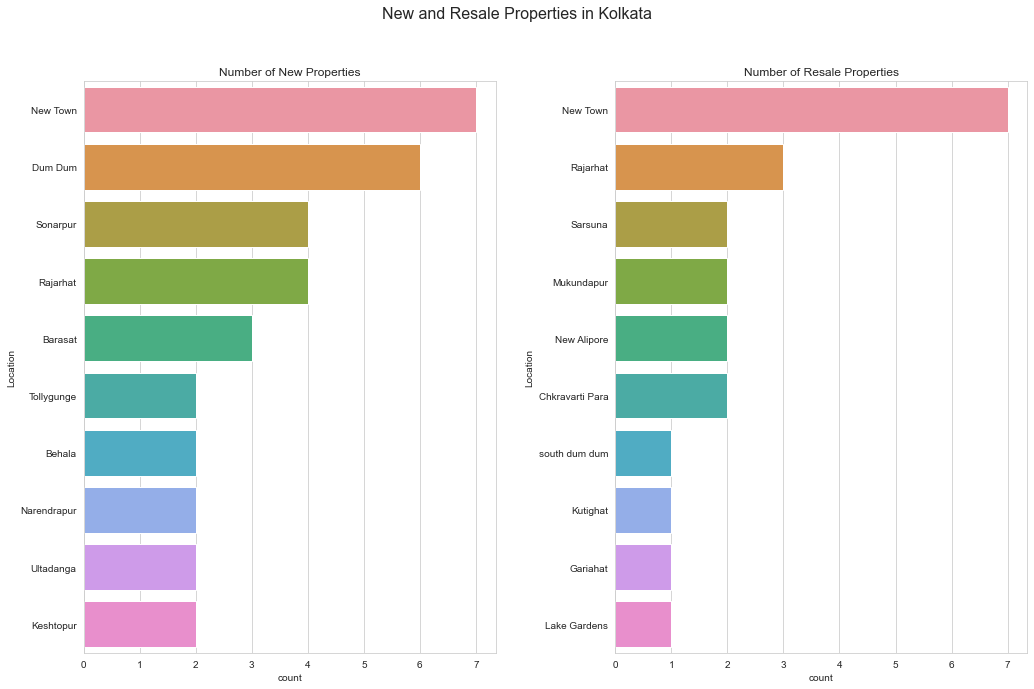

In [57]:
count_plot(Kolkata,'New and Resale Properties in Kolkata')

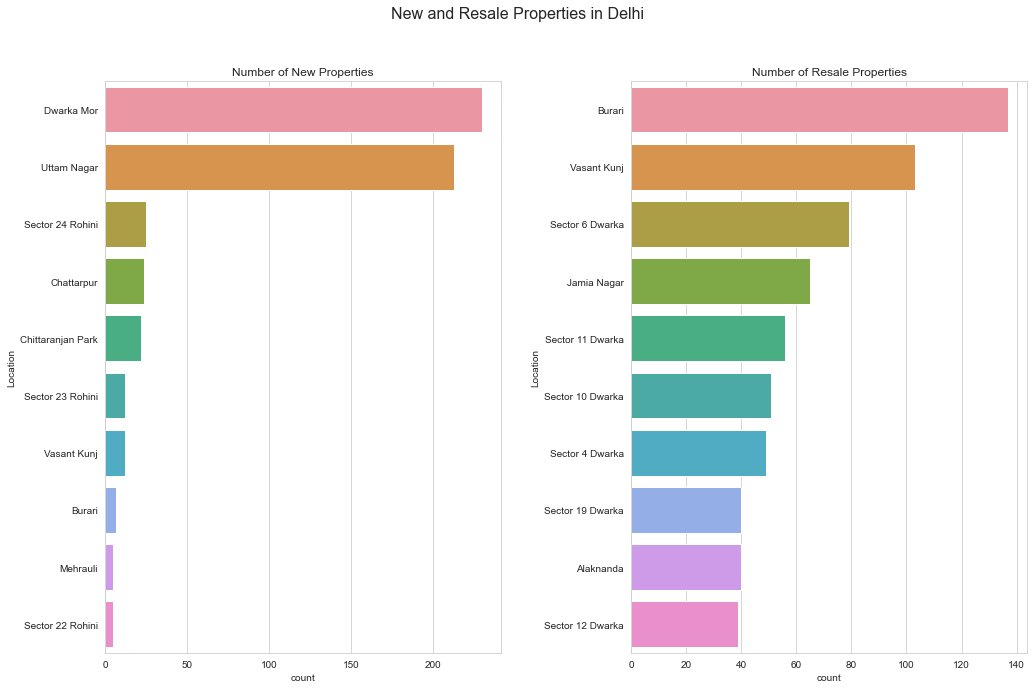

In [58]:
count_plot(Delhi,'New and Resale Properties in Delhi')

In [59]:
def cat_plot(data,title):
    sns.catplot(x='No. of Bedrooms',y='Price',data=data)
    plt.title('No.of Bedrooms Vs Price'+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

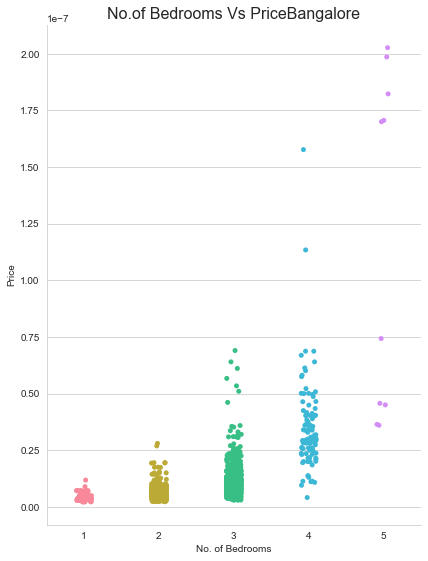

In [60]:
cat_plot(Bangalore,'Bangalore')

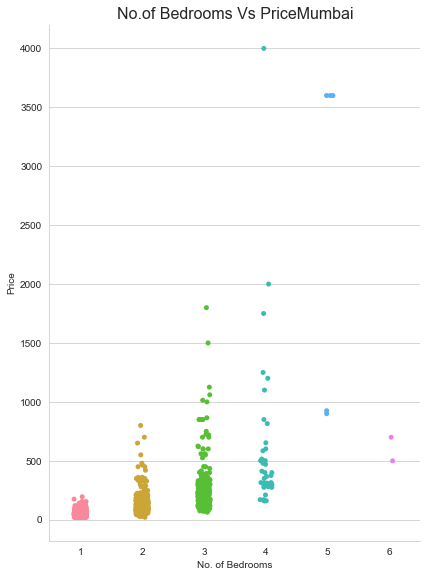

In [61]:
cat_plot(Mumbai,'Mumbai')

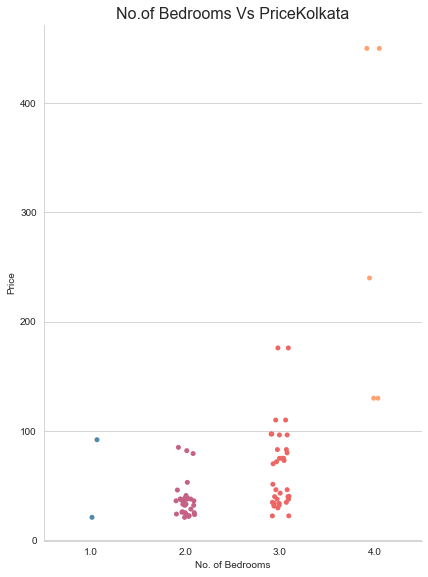

In [62]:
cat_plot(Kolkata,'Kolkata')

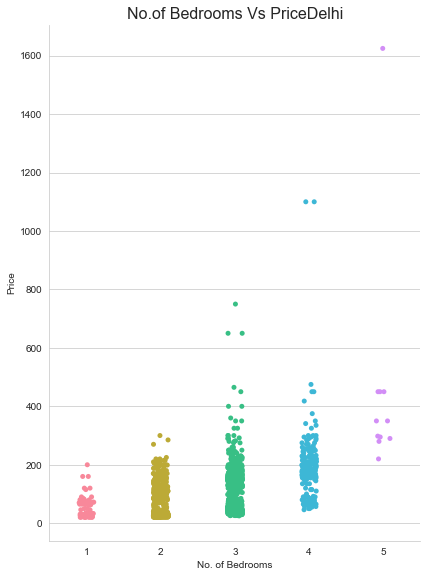

In [63]:
cat_plot(Delhi,'Delhi')

c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

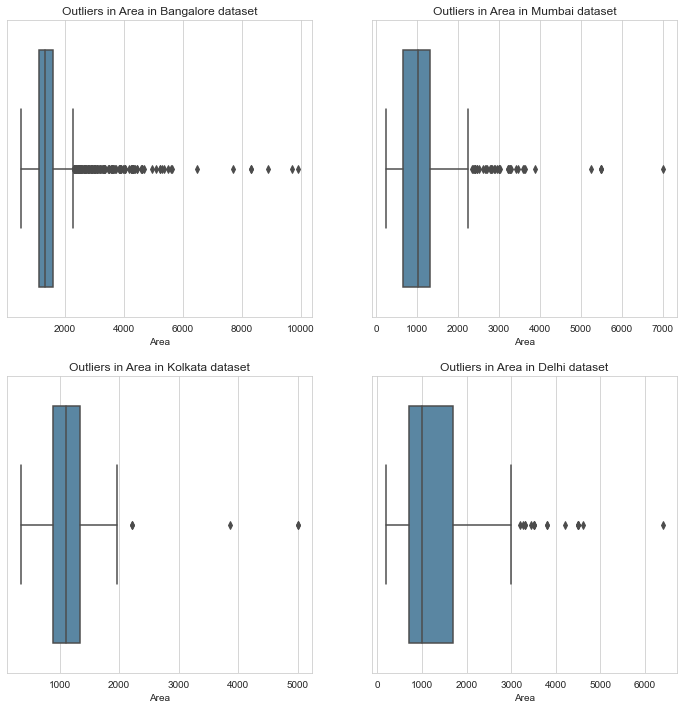

In [64]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(Bangalore['Area'])
plt.title('Outliers in Area in Bangalore dataset')
plt.subplot(222)
sns.boxplot(Mumbai['Area'])
plt.title('Outliers in Area in Mumbai dataset')
plt.subplot(223)
sns.boxplot(Kolkata['Area'])
plt.title('Outliers in Area in Kolkata dataset')
plt.subplot(224)
sns.boxplot(Delhi['Area'])
plt.title('Outliers in Area in Delhi dataset')
plt.show()

c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

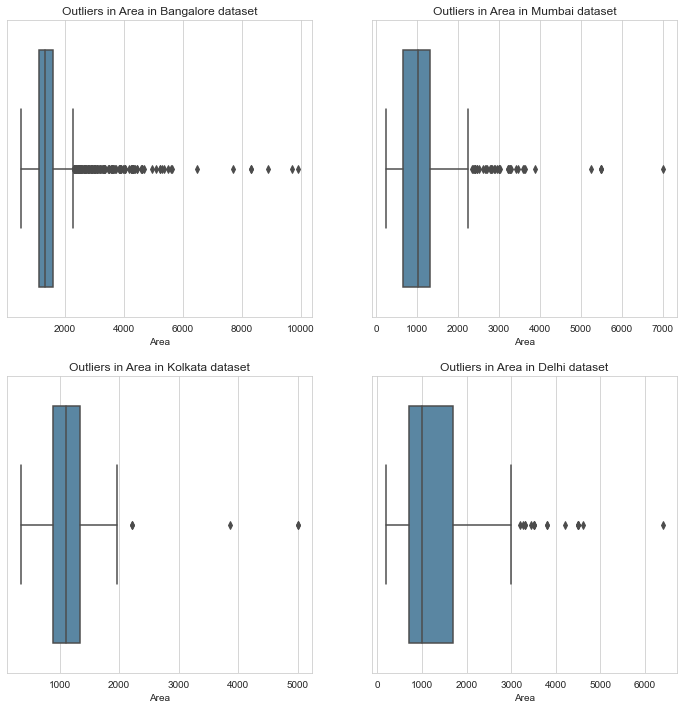

In [65]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(Bangalore['Area'])
plt.title('Outliers in Area in Bangalore dataset')
plt.subplot(222)
sns.boxplot(Mumbai['Area'])
plt.title('Outliers in Area in Mumbai dataset')
plt.subplot(223)
sns.boxplot(Kolkata['Area'])
plt.title('Outliers in Area in Kolkata dataset')
plt.subplot(224)
sns.boxplot(Delhi['Area'])
plt.title('Outliers in Area in Delhi dataset')
plt.show()

c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\91800\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

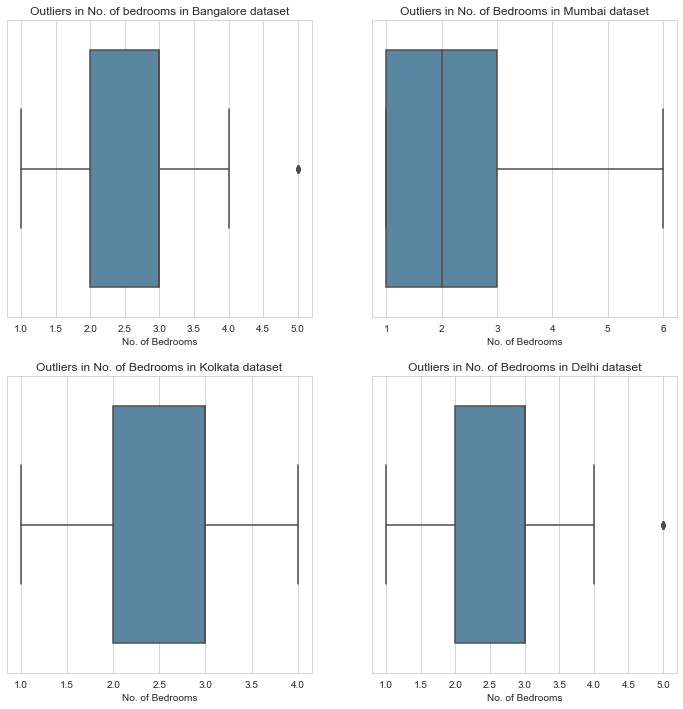

In [66]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(Bangalore['No. of Bedrooms'])
plt.title('Outliers in No. of bedrooms in Bangalore dataset')
plt.subplot(222)
sns.boxplot(Mumbai['No. of Bedrooms'])
plt.title('Outliers in No. of Bedrooms in Mumbai dataset')
plt.subplot(223)
sns.boxplot(Kolkata['No. of Bedrooms'])
plt.title('Outliers in No. of Bedrooms in Kolkata dataset')
plt.subplot(224)
sns.boxplot(Delhi['No. of Bedrooms'])
plt.title('Outliers in No. of Bedrooms in Delhi dataset')
plt.show()

In [67]:
import plotly.graph_objects as go

In [68]:
c1 = ["#4e89ae","#BFD5E2"]
c2 = ["#c56183","#E6BCCA"]
c3 = ["#ed6663","#F7BDBC"]
c4 = ["#ffa372","#FFDECC"]

In [69]:
def pie_chart(df,c,addAll = True):
    df = df.iloc [:,5:-2] 
    fig = go.Figure()
    for column in df.columns.to_list():
        val = df[column].value_counts().rename_axis('unique_values').reset_index(name='val_count')
        labels = val['unique_values']
        values = val['val_count']
        fig.add_trace(
            go.Pie(
                labels=labels, 
                values=values,
                marker_colors=c
            )
        )
        button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])


    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])
    fig.add_layout_image(
    dict(
        xref="paper", yref="paper",
        x=0.5, y=0.95,
        sizex=0.9, sizey=0.6,
        xanchor="center", yanchor="bottom"
    )
    )
    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ])
    
    fig.show()


In [70]:
pie_chart(Bangalore,c1)

In [71]:
pie_chart(Mumbai,c2)

In [72]:
pie_chart(Kolkata,c3)

In [73]:
pie_chart(Delhi,c4)

In [74]:
merged = pd.concat([Bangalore,Mumbai,Kolkata,Delhi], axis=0)

In [75]:
merged.shape

(5425, 40)

In [76]:
merged.columns
merged = merged.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
merged = merged.dropna()

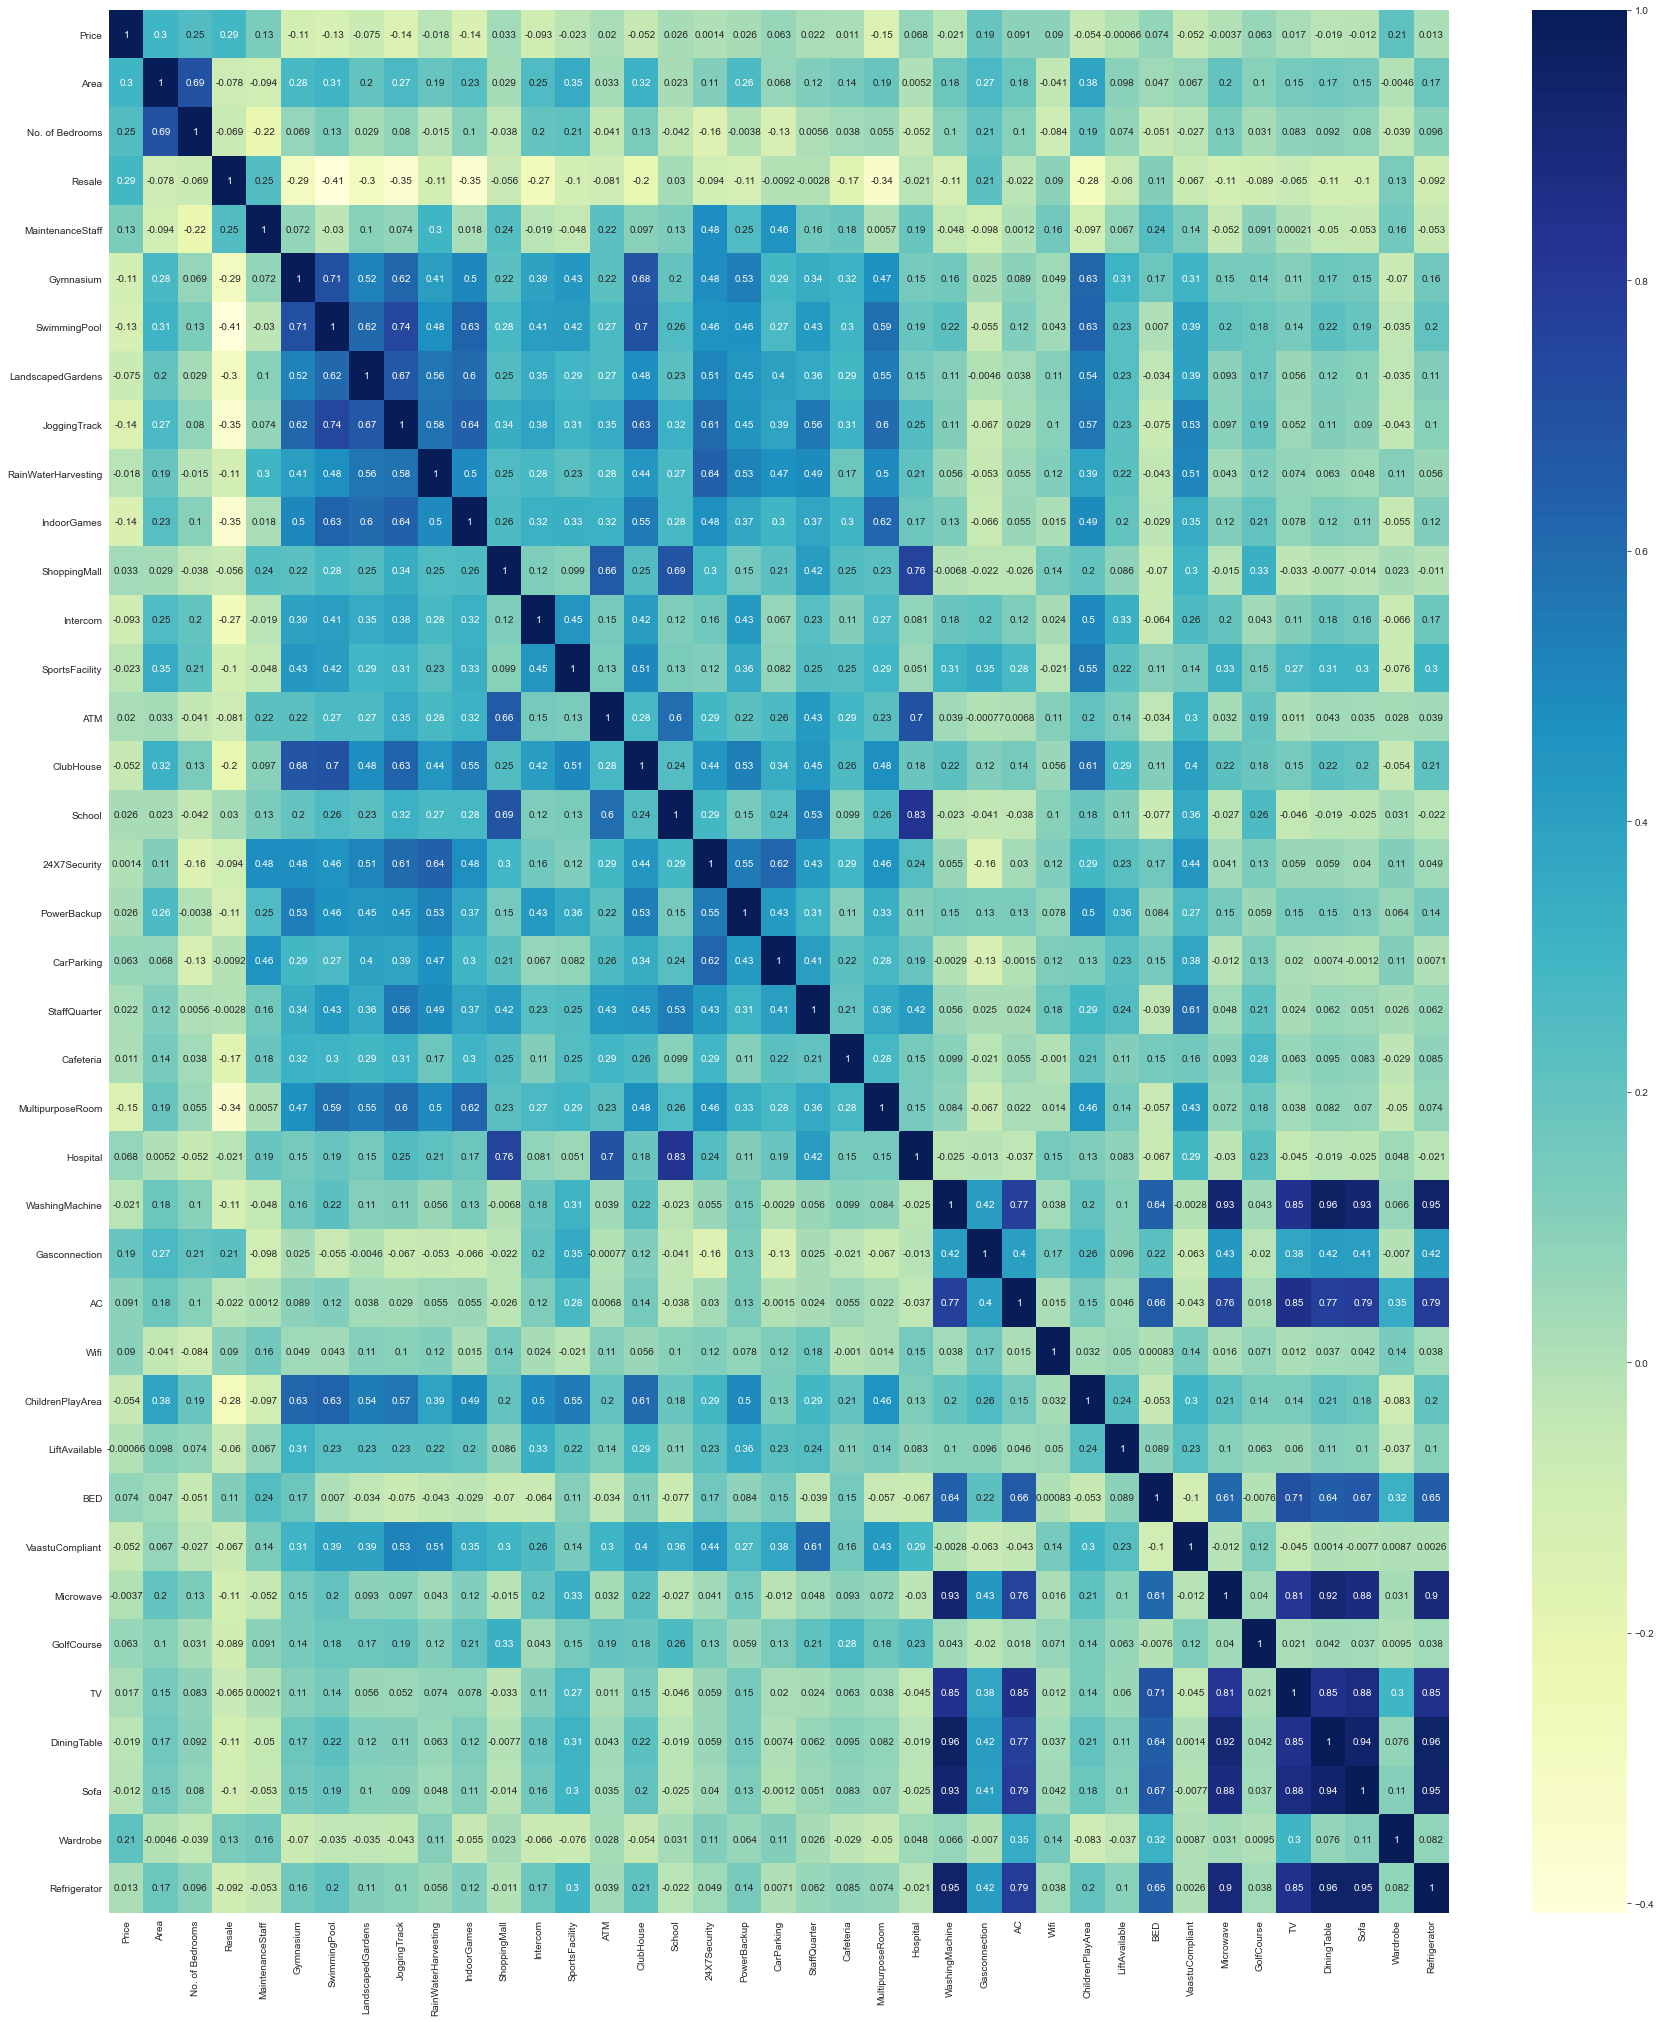

In [77]:
plt.figure(figsize=(30,35))
corr = merged.corr()
sns.heatmap(corr,cmap="YlGnBu",annot=True)
plt.show()

In [78]:
corr_matrix = merged.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                  1.000000
Area                   0.298748
Resale                 0.290375
No. of Bedrooms        0.252019
Wardrobe               0.210782
Gasconnection          0.191347
MaintenanceStaff       0.127194
AC                     0.091171
Wifi                   0.090094
BED                    0.074053
Hospital               0.068063
CarParking             0.063207
GolfCourse             0.062797
ShoppingMall           0.032866
PowerBackup            0.026317
School                 0.026037
StaffQuarter           0.021707
ATM                    0.019843
TV                     0.017082
Refrigerator           0.013009
Cafeteria              0.011027
24X7Security           0.001367
LiftAvailable         -0.000661
Microwave             -0.003693
Sofa                  -0.011553
RainWaterHarvesting   -0.018143
DiningTable           -0.019473
WashingMachine        -0.021125
SportsFacility        -0.023407
ClubHouse             -0.051761
VaastuCompliant       -0.051917
Children

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

In [80]:
#from sklearn.model_selection import train_test_split

#x = merged.drop(['Price'], axis=1) 
#y = np.log1p(merged['Price'])
#X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

#categorical_cols = [cname for cname in x.columns if
                    #x[cname].dtype == "object"] 
                


#numerical_cols = [cname for cname in x.columns if
                 #x[cname].dtype in ['int64','float64','uint8']]


#my_cols = numerical_cols + categorical_cols
#X_train = X_train[my_cols].copy()
#X_val = X_val[my_cols].copy()
#print(categorical_cols,numerical_cols)

['Location'] ['Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC', 'Wifi', 'ChildrenPlayArea', 'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']


In [81]:
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

#num_transformer = Pipeline(steps=[
    #('num_imputer', SimpleImputer(strategy='constant'))
    #])

#cat_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='most_frequent')),
    #('onehot', OneHotEncoder(handle_unknown='ignore'))
    #])

#preprocessor = ColumnTransformer(
    #transformers=[
        #('num',num_transformer,numerical_cols),       
        #('cat',cat_transformer,categorical_cols),
        #])

In [82]:
#def inv_y(transformed_y):
    #return np.exp(transformed_y)

#n_folds = 10

In [83]:
# XGBoost
#model = XGBRegressor(learning_rate=0.01, n_estimators=3460, max_depth=3, min_child_weight=0,gamma=0, subsample=0.7,colsample_bytree=0.7,objective='reg:squarederror', nthread=-1,scale_pos_weight=1, seed=27, reg_alpha=0.00006)
#clf = Pipeline(steps=[('preprocessor', preprocessor),
                      #('model', model)])
#clf.fit(X_train, y_train)
#predict = clf.predict(X_val)
#print('XGBoost: ' + str(mean_absolute_error(inv_y(predict), inv_y(y_val))))


# Lasso  
#from sklearn.linear_model import LassoCV

#model = LassoCV(max_iter=1e7,  random_state=14, cv=n_folds)
#clf = Pipeline(steps=[('preprocessor', preprocessor),
                          #('model', model)])
#clf.fit(X_train, y_train)
#predict = clf.predict(X_val)
#print('Lasso: ' + str(mean_absolute_error(inv_y(predict), inv_y(y_val))))

# GradientBoosting   
#model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=5)
#clf = Pipeline(steps=[('preprocessor', preprocessor),
                          #('model', model)])
#clf.fit(X_train, y_train)
#predict = clf.predict(X_val)
#print('Gradient: ' + str(mean_absolute_error(inv_y(predict), inv_y(y_val))))

XGBoost: 44.53488226883719
Lasso: 61.81459634741543
Gradient: 36.76179125671074


In [84]:
feature_names = ['Area','No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'ChildrenPlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']

X = merged[feature_names]
y = merged['Price']

In [85]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model = RandomForestRegressor().fit(train_X, train_y)

In [87]:
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())


In [88]:
model2 = DecisionTreeRegressor(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

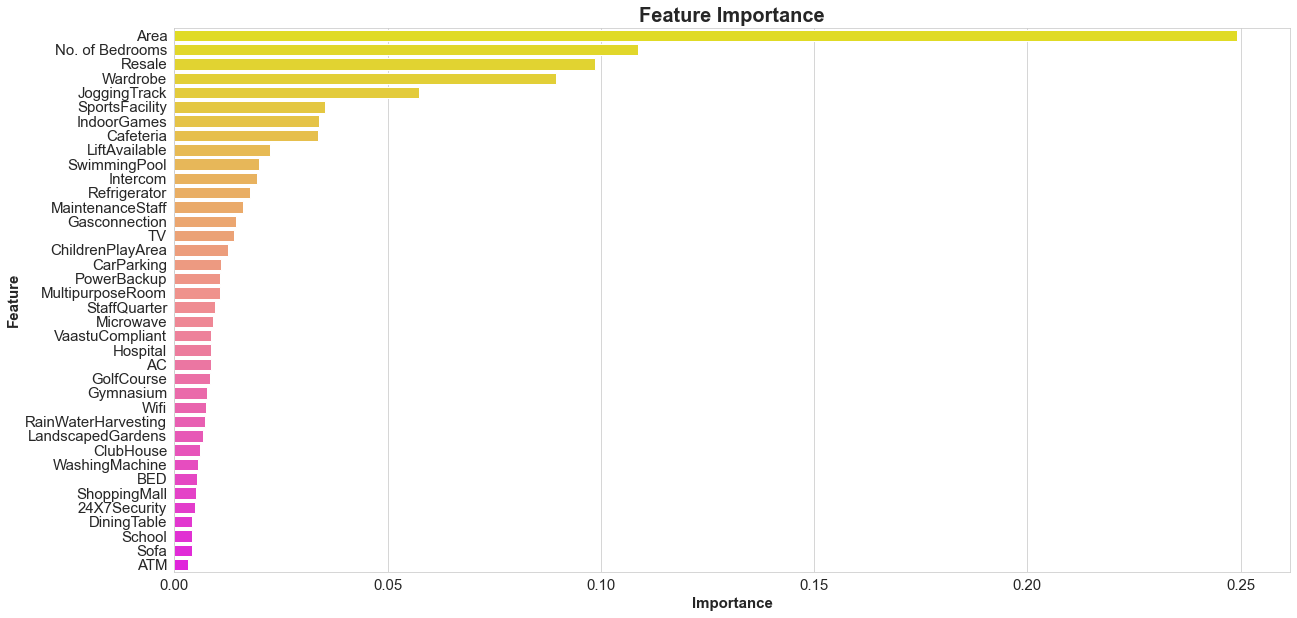

In [91]:
model3 = ExtraTreesRegressor()
model3.fit(train_X, train_y)
fi = pd.DataFrame(model3.feature_importances_,
             columns=['importance'])
fi['feature'] = feature_names
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=fi, x='importance', y='feature',
                 palette="spring_r")
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold");
ax.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

In [93]:
feature_names = ['Area','No. of Bedrooms','MaintenanceStaff','24X7Security']

X = merged[feature_names]
y = merged['Price']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [94]:
def train_model(m,name):
    model = m
    model.fit(X=train_X, y=train_y)
    predictions = model.predict(val_X)
    mae = mean_absolute_error(val_y, predictions)
    r2 = r2_score(val_y, predictions)
    print("{0} mae {1} r2 {2}".format(name,mae,r2))

train_model(DecisionTreeRegressor(),"Decision Tree Regressor")
train_model(RandomForestRegressor(),"Random Forest Regressor")   
train_model(XGBRegressor(n_estimators=600),"XGBoost Regressor")   

Decision Tree Regressor mae 45.42866672380019 r2 0.28465579535208674
Random Forest Regressor mae 46.97567538892651 r2 0.5198626190280788
XGBoost Regressor mae 43.25378173713291 r2 0.5260997717146723


In [97]:
from joblib import dump,load
dump(model,'Metropolitan Cities House Price Predictor')

['Metropolitan Cities House Price Predictor']